# New-Car_main

In [4]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

fin de l'importation de la blibliotech 

In [10]:
df = pd.read_csv('carData.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Car_Name   Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0       False  False          False          False       False      False   
1       False  False          False          False       False      False   
2       False  False          False          False       False      False   
3       False  False          False          False       False      False   
4       False  False          False          False       False      False   
..        ...    ...            ...            ...         ...        ...   
296     False  False          False          False       False      False   
297     False  False          False          False       False      False   
298     False  False          False          False       False      False   
299     False  False          False          False       False      False   
300     False  False          False          False       False      False   

     Seller_T

<AxesSubplot:>

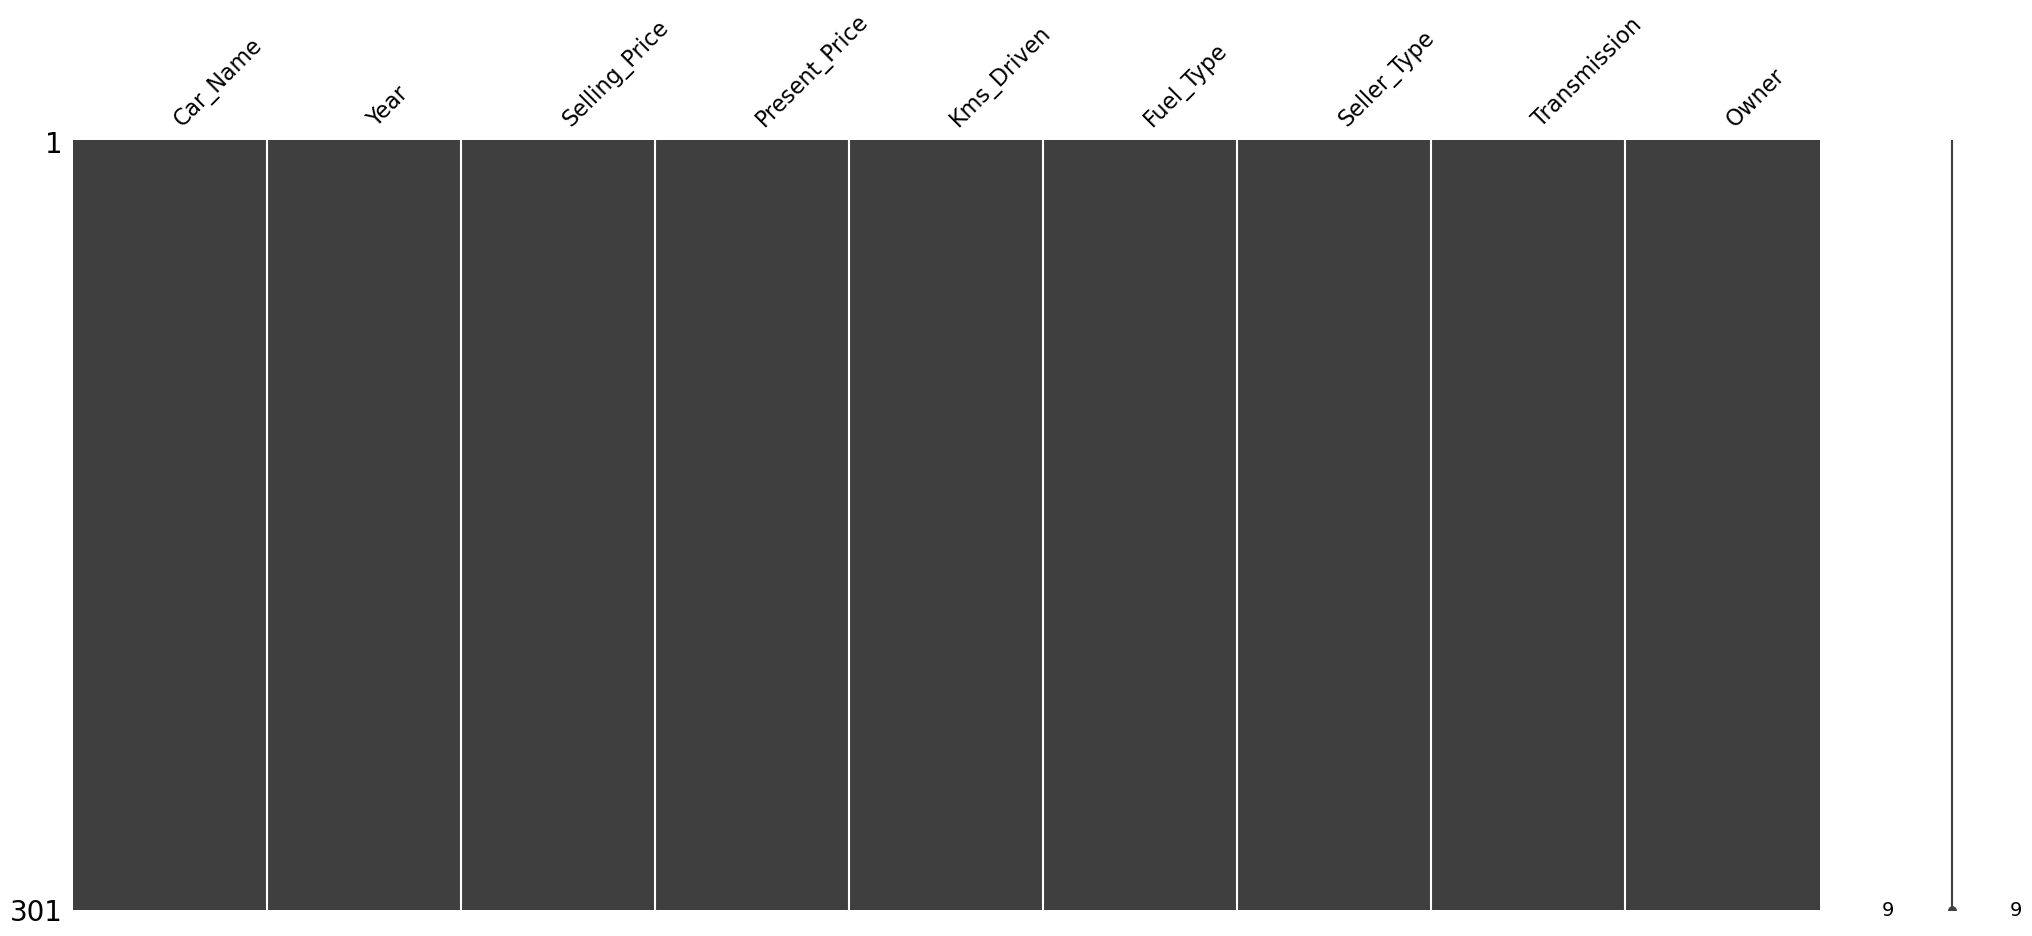

In [8]:
msno.matrix(df)

on vois que aucune donner nous est manquante 

## debut du traitement de la donnée 

In [23]:
dc = []
for a in df:
    print(a)
    dc.append(a)

Car_Name
Year
Selling_Price
Present_Price
Kms_Driven
Fuel_Type
Seller_Type
Transmission
Owner


In [27]:
dr_Car_Name = []
dr_Year = []
dr_Selling_Price = []
dr_Present_Price = []
dr_Kms_Driven = []
dr_Fuel_Type = []
dr_Seller_Type = []
dr_Transmission = []
dr_Owner = []
for b in df.columns:
    if b = "Car_Name":
        dr_Car_Name.append (b)
        
    if b = "Year":
        dr_Year.append (b)
        
    if b = "Selling_Price":
        dr_Selling_Price.append (b)
        
    if b = "Present_Price":
        dr_Present_Price.append (b)
        
    if b = "Kms_Driven":
        dr_Kms_Driven.append (b)
        
    if b = "Fuel_Type":
        dr_Fuel_Type.append (b)
        
    if b = "Seller_Type":
        dr_Seller_Type.append (b)
        
    if b = "Transmission":
        dr_Transmission.append (b)
        
    if b = "Owner":
        dr_Owner.append (b)
print(dr_Car_Name, dr_Fuel_Type, dr_Kms_Driven, dr_Owner, dr_Present_Price, dr_Seller_Type ,dr_Selling_Price, dr_Transmission, dr_Year)
        

SyntaxError: invalid syntax (870076648.py, line 11)